In [1]:
import json
import sys
import os
import skimage
import time
import collections
import pickle as pkl
import glob
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from scipy import ndimage
from scipy import special
from scipy import sparse
import h5py
import zarr
import datashader as ds

import anndata
import nibabel as nib
import ants
import matplotlib.pyplot as plt 

# customized 
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *
import importlib
from dredFISH.Analysis.__init__plots import *
sns.set_style('white')
from dredFISH.Analysis import powerplots
importlib.reload(powerplots)
from dredFISH.Analysis import imageu
importlib.reload(imageu)
from dredFISH.Analysis import regu 
importlib.reload(regu)

<module 'dredFISH.Analysis.regu' from '/home/fangming/projects/dredfish/packages/dredFISH/dredFISH/Analysis/regu.py'>

In [2]:
prj_dir = '/home/fangming/projects/dredfish/'
dat_dir = prj_dir + 'data/'
res_dir = prj_dir + 'results/'
fig_dir = prj_dir + 'figures/'

In [3]:
# average template
ccf = np.load('/bigstore/binfo/mouse/Brain/average_template.npy')
print(ccf.shape)

(1320, 800, 1140)


dredfish (97786, 2)


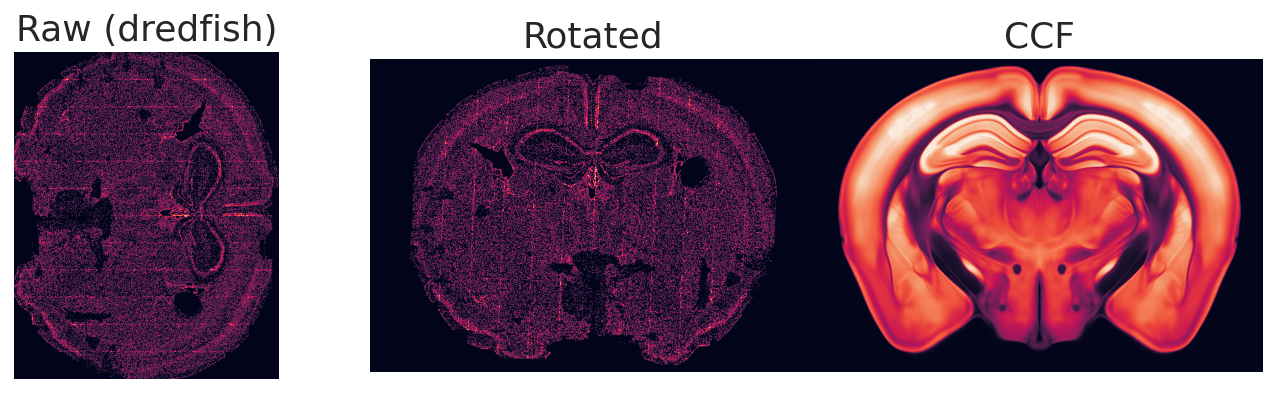

In [5]:
dataset='dredfish'
# set up configs
input_file = dat_dir + f'/proc/{dataset}_cellcoords.csv'
flip = False
idx_ccf = 720

# dataset
outprefix = res_dir + f'{dataset}_v2_'
outprefix_affine = outprefix + 'affine_'
outprefix_syn = outprefix + 'syn_'
output = outprefix + 'registered.hdf5'
force = True

# check output files
# outprefix = ''
if outprefix:
    files = glob.glob(outprefix+'*')
    if len(files) > 0:
        if force: 
            for file in files:
                os.remove(file)
        else:
            raise ValueError(f'Files with {outprefix} existed')

# load data
df = pd.read_csv(input_file, header=None, names=['x', 'y'])
print(dataset, df.shape)

# initiation
data = regu.Data(dataset, df.values)
# rotate
data.pca_rotate()
if flip:
    data.flip_rotated()
# add CCF
data.add_matched_ccf(idx_ccf, ccf[idx_ccf,:,:])
# pad to ccf
data.pad()

data.render_sanity_check()

In [ ]:
# # set up configs
# file = paths[dataset]
# flip = flip_configs[dataset]
# idx_ccf = matched_ccf_plates[dataset]

# # dataset
# outprefix = res_dir + f'{dataset}_v2_'
# outprefix_affine = outprefix + 'affine_'
# outprefix_syn = outprefix + 'syn_'
# output = outprefix + 'registered.hdf5'
# force = True

# # check output files
# # outprefix = ''
# if outprefix:
#     files = glob.glob(outprefix+'*')
#     if len(files) > 0:
#         if force: 
#             for file in files:
#                 os.remove(file)
#         else:
#             raise ValueError(f'Files with {outprefix} existed')

# # load data
# df = pd.read_csv(file, header=None, names=['x', 'y'])
# print(dataset, df.shape)

# # initiation
# data = regu.Data(dataset, df.values)
# # rotate
# data.pca_rotate()
# if flip:
#     data.flip_rotated()
# # add CCF
# data.add_matched_ccf(idx_ccf, ccf[idx_ccf,:,:])
# # pad to ccf
# data.pad()

# # affine
# data.run_affine(outprefix_affine)
# # syn
# data.run_syn(
#     outprefix_syn,
#     type_of_transform='SyNOnly', # SyNCC (CC) or SyNOnly (MI)
#     syn_metric='MI', # 'CC' 5
#     syn_sampling=20, # sync_sampling determines nbins or region radius meansquares, CC, MI/mattes, demons
#     verbose=False,
#     grad_step=0.2, # step of gradient
#     flow_sigma=3, # gaussian regularize the flow but not everything
#     total_sigma=0, # ?
#     reg_iterations=(100, 100, 50, 30, 0), 
#     # **kwargs,
#     )
# # save
# data.save(output, force=True)

# # check results
# data.render_all_comparison()